In [10]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [ ]:
with open('diseases_final.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

diseases_df = pd.json_normalize(data)

symptom_records = []
for entry in data:
    for s in entry.get('symptoms', []):
        symptom_records.append({
            'disease_name': entry.get('disease_name'),
            'global_index': entry.get('global_index'),
            'symptom_name': s.get('symptom_name'),
            'symptom_code': s.get('symptom_code'),
            'confidence_score': s.get('confidence_score')
        })
symptoms_df = pd.DataFrame(symptom_records)

In [ ]:
total_diseases = diseases_df.shape[0]
total_symptoms = symptoms_df.shape[0]
unique_symptom_names = symptoms_df['symptom_name'].nunique()
unique_symptom_codes = symptoms_df['symptom_code'].nunique()

print(f"Total diseases: {total_diseases}")
print(f"Total symptom entries: {total_symptoms}")
print(f"Unique symptom names: {unique_symptom_names}")
print(f"Unique symptom codes: {unique_symptom_codes}")

Total diseases: 10143
Total symptom entries: 75528
Unique symptom names: 22754
Unique symptom codes: 16065


In [ ]:
summary_df = pd.DataFrame({
    'Metric': ['Diseases', 'Symptom Entries', 'Unique Symptom Names', 'Unique Symptom Codes'],
    'Count': [total_diseases, total_symptoms, unique_symptom_names, unique_symptom_codes]
})
display(summary_df)


,Metric,Count
0,Diseases,10143
1,Symptom Entries,75528
2,Unique Symptom Names,22754
3,Unique Symptom Codes,16065


In [ ]:
symptom_counts = symptoms_df.groupby('disease_name').size().reset_index(name='num_symptoms')
display(symptom_counts)


,disease_name,num_symptoms
0,A53 diffuse large b-cell lymphoma,7
1,Aagenaes syndrome,8
2,Aarskog syndrome,8
3,Abacavir allergy,13
4,Abcd syndrome,9
...,...,...
10069,Zika fever,6
10070,Zika virus congenital syndrome,7
10071,Zollinger-ellison syndrome,8
10072,Zttk syndrome,10


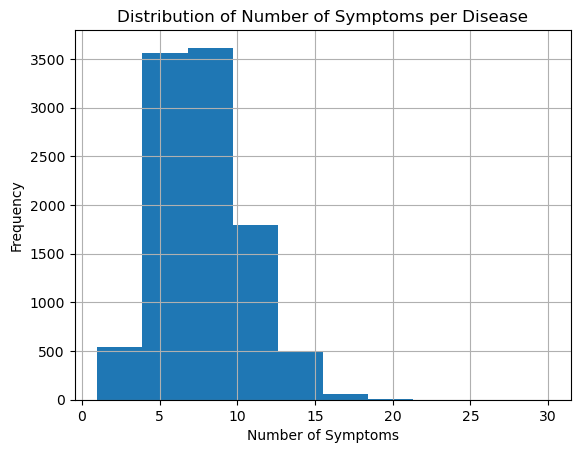

In [ ]:
# Histogram: Number of symptoms per disease
plt.figure()
symptom_counts['num_symptoms'].hist()
plt.title('Distribution of Number of Symptoms per Disease')
plt.xlabel('Number of Symptoms')
plt.ylabel('Frequency')
plt.show()

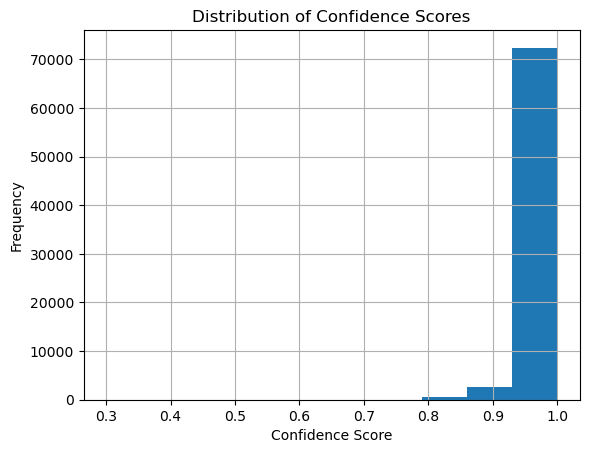

In [ ]:
# Confidence score distribution
plt.figure()
symptoms_df['confidence_score'].hist()
plt.title('Distribution of Confidence Scores')
plt.xlabel('Confidence Score')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Top 10 most common symptom names
top_names = symptoms_df['symptom_name'].value_counts().head(10).reset_index()
top_names.columns = ['symptom_name', 'count']
display(top_names)

,symptom_name,count
0,Fatigue,1376
1,Fever,900
2,Seizures,850
3,Weight loss,775
4,Abdominal pain,734
5,Muscle weakness,655
6,Shortness of breath,646
7,Intellectual disability,566
8,Nausea and vomiting,523
9,Pain,490


In [ ]:
# Top 10 most common symptom codes
top_codes = symptoms_df['symptom_code'].value_counts().head(10).reset_index()
top_codes.columns = ['symptom_code', 'count']
display(top_codes)

,symptom_code,count
0,S0002,1376
1,S0034,1041
2,S0359,997
3,S0004,905
4,S0097,776
5,S0199,761
6,S0335,724
7,S0007,701
8,S0200,589
9,S0075,587


In [ ]:
# Average confidence per disease
avg_conf = symptoms_df.groupby('disease_name')['confidence_score'].mean().reset_index(name='avg_confidence')
display(avg_conf)

,disease_name,avg_confidence
0,A53 diffuse large b-cell lymphoma,1.000000
1,Aagenaes syndrome,1.000000
2,Aarskog syndrome,1.000000
3,Abacavir allergy,0.992308
4,Abcd syndrome,0.955556
...,...,...
10069,Zika fever,1.000000
10070,Zika virus congenital syndrome,1.000000
10071,Zollinger-ellison syndrome,0.987500
10072,Zttk syndrome,1.000000


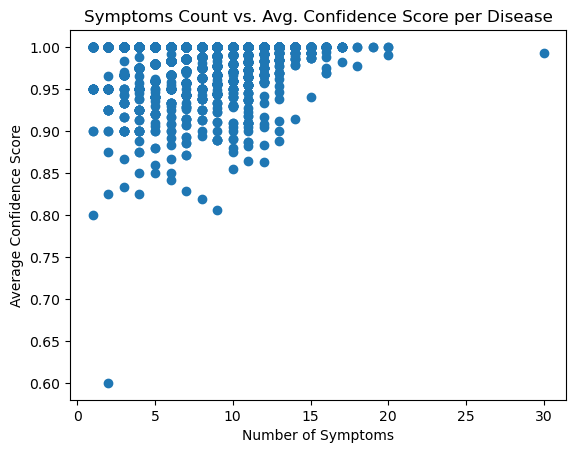

In [ ]:
# Scatter: symptoms count vs. average confidence score
merged = symptom_counts.merge(avg_conf, on='disease_name')
plt.figure()
plt.scatter(merged['num_symptoms'], merged['avg_confidence'])
plt.title('Symptoms Count vs. Avg. Confidence Score per Disease')
plt.xlabel('Number of Symptoms')
plt.ylabel('Average Confidence Score')
plt.show()